In [1]:
import numpy as np
from scipy import integrate
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import seaborn as sns
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

In [2]:
# Definición de la pista
L = 2
x = np.linspace(-L,L,100)
def pista(x):
    y = 0.5*np.sin(np.pi*x/L/2)**2
    return y
def pista_dx(x):
    y = np.pi/L/2*np.cos(np.pi*x/L/2)*np.sin(np.pi*x/L/2)
    return y

x0 = -1
y0 = pista(x0)


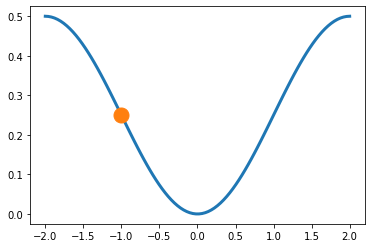

In [5]:
fig,ax = plt.subplots()
ax.plot(x,pista(x),linewidth=3)
ax.plot(x0,y0,'o',markersize=15);

In [178]:
def ball(X, t0, m = 1, v0 = 0,fr = 0):
    x1,x2 = X
    
    g = 9.8
    #F = m dv/dt
    
    alpha = np.arctan(pista_dx(x1))
    dx1 = x2*np.cos(alpha)
    if x2!= 0:
        dx2 = (g*np.sin(-alpha) - np.abs(x2)*fr/m/x2)
    else:
        dx2 = g*np.sin(-alpha) 
    #u, v = (u_p*np.cos(alpha),u_p*np.sin(alpha))
    return dx1,dx2
    

In [181]:
T,N = [11.5,500]
t = np.linspace(0, T, N)
x0i = -1
y0i = pista(x0i)
coord0 = (x0i,0)
x_t = np.asarray(integrate.odeint(ball, coord0, t)).T
xp = x_t[0]
yp = pista(xp)                  

In [ ]:
fig = plt.figure()
l, = plt.plot([], [], 'k-o')

fig, ax = plt.subplots()

pista_plot, = ax.plot(x,pista(x),linewidth=4)
line, = ax.plot(xp[0],yp[0],'o',markersize=15)

ax.set_xlim(-2, 2)
ax.set_ylim(-.1, .5)

def animate(i):
    ti = int(i/N*T)   
    
    line.set_data((xp[i], yp[i]))
    return line

anim = animation.FuncAnimation(fig, animate, frames=N, interval=30)
HTML(anim.to_html5_video())


In [159]:
anim.save('limit_cycle_1.mp4', writer = 'ffmpeg', fps=24, extra_args=['-vcodec','libx264'], dpi = 150)

# Damping

In [169]:
def ball2(X, t0, m = 1, v0 = 0,fr = 0.3):
    x1,x2 = X
    fr = 0.3
    g = 9.8
    #F = m dv/dt
    
    alpha = np.arctan(pista_dx(x1))
    dx1 = x2*np.cos(alpha)
    if x2!= 0:
        dx2 = (g*np.sin(-alpha) - np.abs(x2)*fr/m/x2)
    else:
        dx2 = g*np.sin(-alpha) 
    #u, v = (u_p*np.cos(alpha),u_p*np.sin(alpha))
    return dx1,dx2

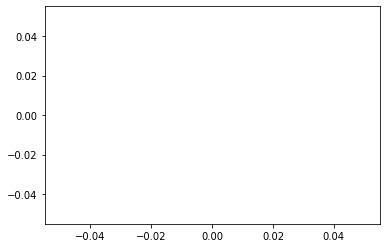

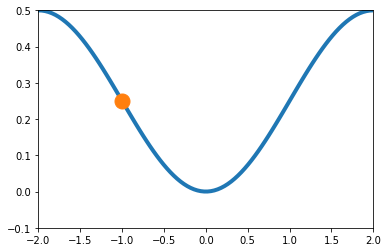

In [172]:
T,N = [11.5,500]
t = np.linspace(0, T, N)
x0i = -1
y0i = pista(x0i)
coord0 = (x0i,0)
x_t = np.asarray(integrate.odeint(ball2, coord0, t,args=(1,0,0.3))).T
xp = x_t[0]
yp = pista(xp)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

fig, ax = plt.subplots()

pista_plot, = ax.plot(x,pista(x),linewidth=4)
line, = ax.plot(xp[0],yp[0],'o',markersize=15)

ax.set_xlim(-2, 2)
ax.set_ylim(-.1, .5)

def animate(i):
    ti = int(i/N*T)   
    
    line.set_data((xp[i], yp[i]))
    return line

anim = animation.FuncAnimation(fig, animate, frames=N, interval=30)
HTML(anim.to_html5_video())

In [174]:
anim.save('limit_cycle_damped.mp4', writer = 'ffmpeg', fps=24, extra_args=['-vcodec','libx264'], dpi = 150)